# исследования датасета алмазов

цель - определять стоимость алмаза

# Инициализация проекта

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [117]:

data= pd.read_csv('../data/diamonds.csv')
data = data.drop(columns = ["Unnamed: 0"])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `carat` — вес бриллианта в каратах
- `cut` — качество огранки
- `color` — цвет 
- `clarity` - чистота 
- `depth` - общая глубина в процентах
- `table` - площадь - ширина верхней точки относительно самой широкой точки
- `price` — цена
- `x` - длина
- `y` - ширина
- `z` - высота
</font>

In [118]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), str(3)
memory usage: 4.1 MB


In [119]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- столбцов с пропушенными столбцами нет
- солбцы `cut`, `color`, `clarity` представлены str - требуют обработки
- столбец `price` - int32
- остальные float64
</font>

## Коррекция типов данных

In [120]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), str(3)
memory usage: 4.1 MB


In [121]:
data["carat"] = data["carat"].astype("float32")
data["depth"] = data["depth"].astype("float32")
data["table"] = data["table"].astype("int32")
data["z"] = data["z"].astype("float32")
data["x"] = data["x"].astype("float32")
data["y"] = data["y"].astype("float32")
data["price"] = data["price"].astype("int32")

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.799999,57,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.099998,55,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.799999,60,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.000000,58,2757,6.15,6.12,3.74


In [122]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float32
 1   cut      53940 non-null  str    
 2   color    53940 non-null  str    
 3   clarity  53940 non-null  str    
 4   depth    53940 non-null  float32
 5   table    53940 non-null  int32  
 6   price    53940 non-null  int32  
 7   x        53940 non-null  float32
 8   y        53940 non-null  float32
 9   z        53940 non-null  float32
dtypes: float32(5), int32(2), str(3)
memory usage: 2.7 MB


In [123]:
data["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [124]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [125]:
data["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [126]:
dict_cut = {'Ideal': 4,
             'Premium': 3,
             'Very Good': 2,
             'Good': 1,
             'Fair': 0}

dict_color = {'D': 6,
             'E': 5,
             'F': 4,
             'G': 3,
             'H': 2,
             'I': 1,
             'J': 0}

dict_clarity = {'IF': 7,
                'VVS1': 6,
                'VVS2': 5,
                'VS1': 4,
                'VS2': 3,
                'SI1': 2,
                'SI2': 1,
                'I1': 0}

In [127]:
data['cut'] = data['cut'].map(dict_cut).astype("int8")
data['color'] = data['color'].map(dict_color).astype("int8")
data['clarity'] = data['clarity'].map(dict_clarity).astype("int8")

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.500000,55,326,3.95,3.98,2.43
1,0.21,3,5,2,59.799999,61,326,3.89,3.84,2.31
2,0.23,1,5,4,56.900002,65,327,4.05,4.07,2.31
3,0.29,3,1,3,62.400002,58,334,4.20,4.23,2.63
4,0.31,1,0,1,63.299999,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.799999,57,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.099998,55,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.799999,60,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.000000,58,2757,6.15,6.12,3.74


str данные `cut`, `color`, `clarity` являются порядковыми, поэтому их можно заменить кодировкой через словарь

In [128]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float32
 1   cut      53940 non-null  int8   
 2   color    53940 non-null  int8   
 3   clarity  53940 non-null  int8   
 4   depth    53940 non-null  float32
 5   table    53940 non-null  int32  
 6   price    53940 non-null  int32  
 7   x        53940 non-null  float32
 8   y        53940 non-null  float32
 9   z        53940 non-null  float32
dtypes: float32(5), int32(2), int8(3)
memory usage: 1.6 MB


In [129]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.448665,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.239779,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900002,31.799999


# EDA

C:\Users\danii\AppData\Local\Temp\ipykernel_19768\1420209071.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


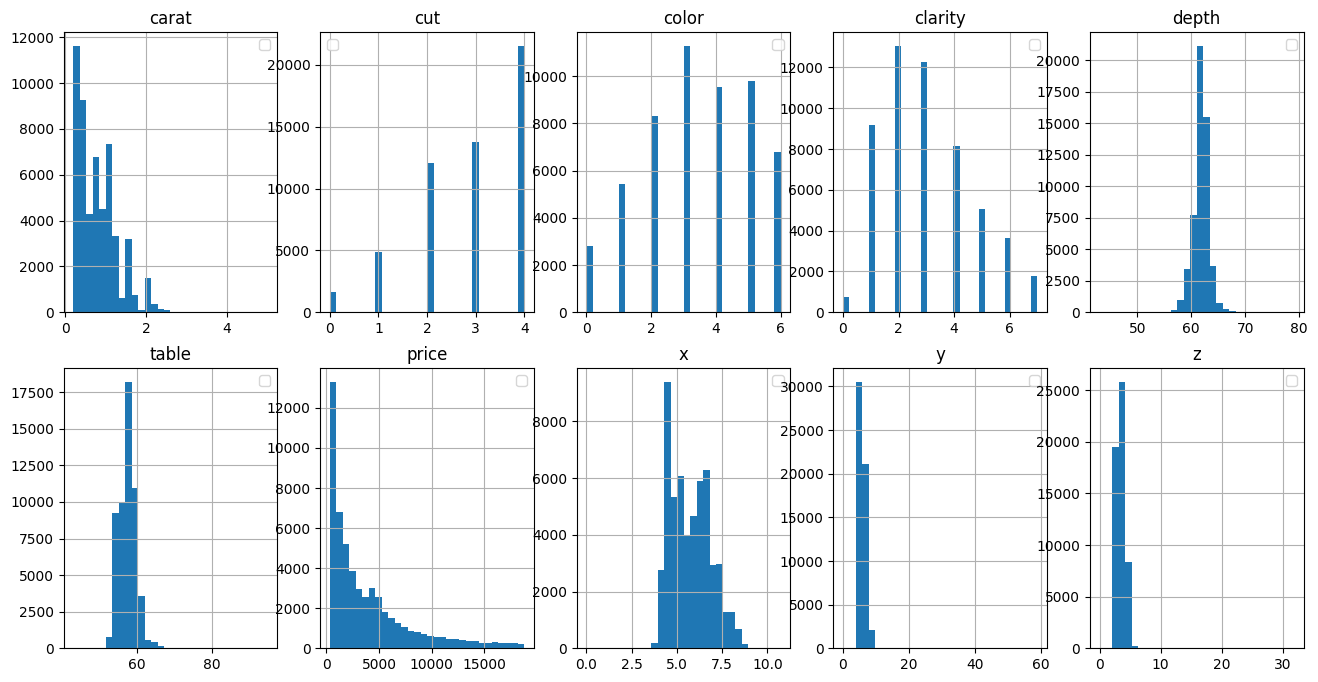

In [130]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    data[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].legend()

Из графиков видно, что цена `price` бриллианта обратно пропорционально и количеству, что весьма логично. И это характеристика почти не содержит выбросов
Так же видно, что некоторые признаки содержат явные выбросы, усложняющие чтение данных

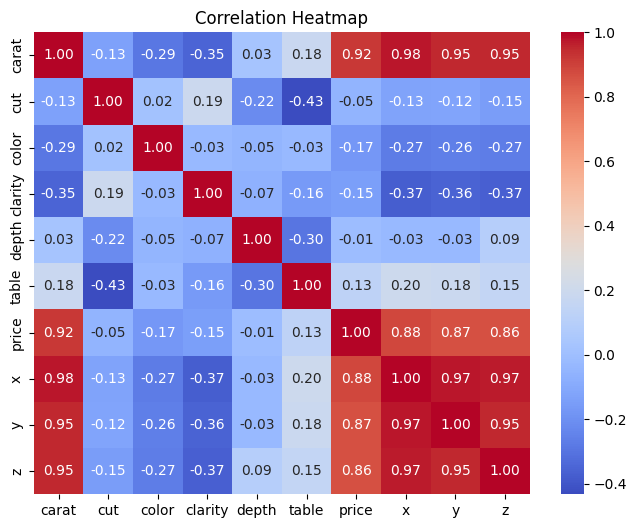

In [131]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Анализ карты**

- `price` напрямую и очень силльно коррелирует с размерами (в равной степени) бриллианта (`x`, `y`, `z`) и весом `carat`
- `cat` и `table` имеют наибольшую отрицательную корреляцию (-0.47)
- `color` и `darity` слабо отрицательно коррелируют с размерами `x`, `y`, `z` и ценой `price`  
- остальные корреляции незначительны

# обработка выбросов

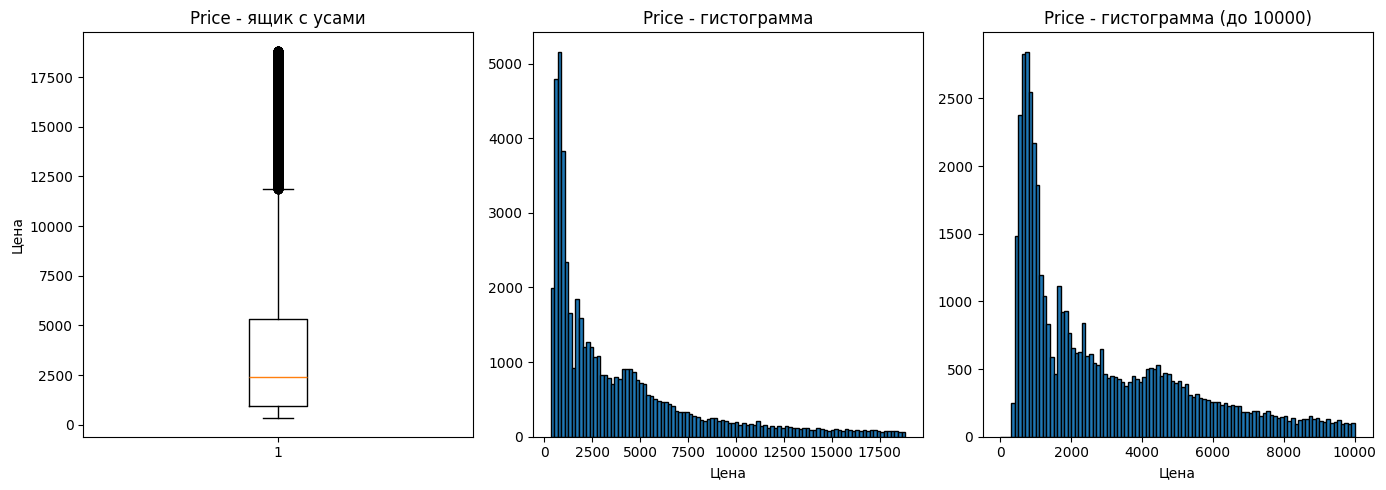

In [132]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.boxplot(data['price'])
plt.title('Price - ящик с усами')
plt.ylabel('Цена')

plt.subplot(1, 3, 2)
plt.hist(data['price'], bins=100, edgecolor='black')
plt.title('Price - гистограмма')
plt.xlabel('Цена')

plt.subplot(1, 3, 3)
plt.hist(data['price'], bins=100, edgecolor='black', range=(0, 10000))
plt.title('Price - гистограмма (до 10000)')
plt.xlabel('Цена')

plt.tight_layout()
plt.show()

Из графика видно, что очень ценные камни очень редки, и, соледовательно, они могут интерпретироваться как выбросы. Поэтому надо очень осторожно проводить анализ

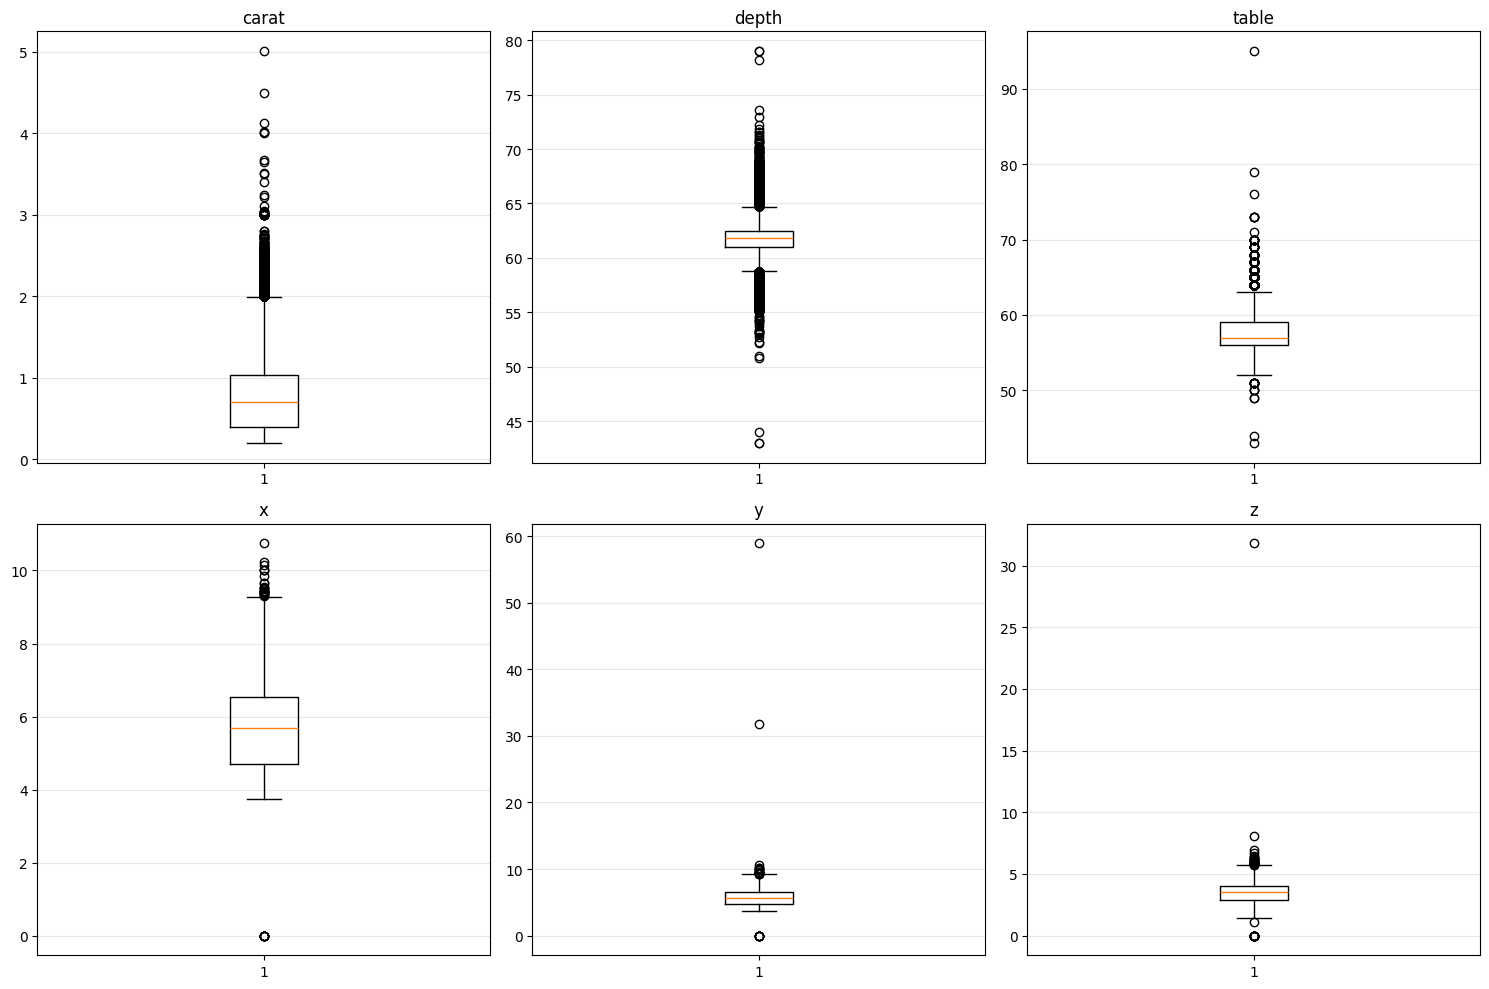

In [133]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].boxplot(data[col])
    axes[i].set_title(f'{col}')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [134]:
def gentle_cap(df, feature, multiplier=3.0):
    df_capped = df.copy()
    
    Q1 = df_capped[feature].quantile(0.25)
    Q3 = df_capped[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    
    n_lower = (df_capped[feature] < lower).sum()
    n_upper = (df_capped[feature] > upper).sum()
    
    df_capped[feature] = df_capped[feature].clip(lower, upper)
    
    print(f"{feature}: ограничено {n_lower + n_upper} значений ({n_lower} снизу, {n_upper} сверху)")
    return df_capped

In [135]:
df_capped = data.copy()

for col in features + ['price']:
    df_capped = gentle_cap(df_capped, col, multiplier=4.0)

carat: ограничено 8 значений (0 снизу, 8 сверху)
depth: ограничено 86 значений (22 снизу, 64 сверху)
table: ограничено 8 значений (1 снизу, 7 сверху)
x: ограничено 0 значений (0 снизу, 0 сверху)
y: ограничено 2 значений (0 снизу, 2 сверху)
z: ограничено 1 значений (0 снизу, 1 сверху)
price: ограничено 0 значений (0 снизу, 0 сверху)


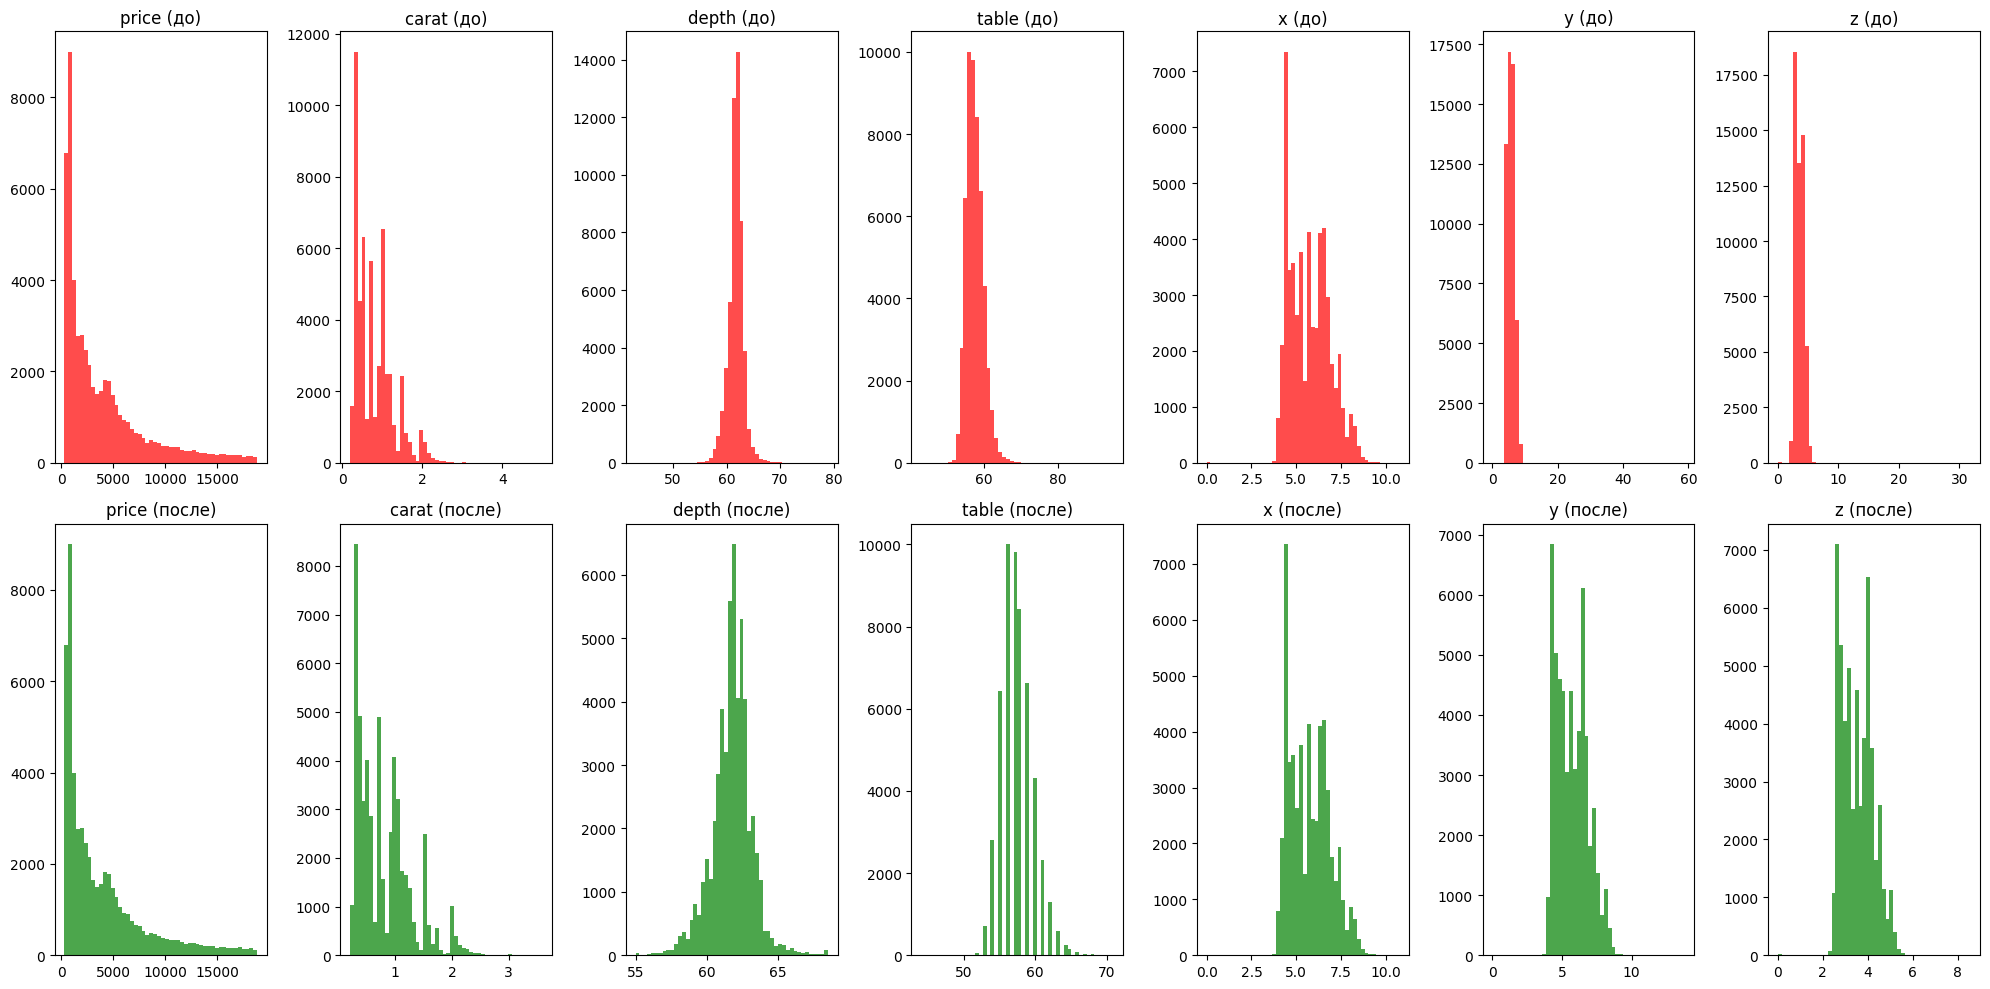

In [136]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
plot_cols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

for i, col in enumerate(plot_cols):
    axes[0, i].hist(data[col], bins=50, alpha=0.7, color='red')
    axes[0, i].set_title(f'{col} (до)')
    
    axes[1, i].hist(df_capped[col], bins=50, alpha=0.7, color='green')
    axes[1, i].set_title(f'{col} (после)')

plt.tight_layout()
plt.show()

In [137]:
df_capped.to_csv("../data/final_data_diamons.csv")

Для магкой обработки, был примен не межквартильный размах и удаление, а ограничение с большим множителем, чтобы не потерять дорогие алмазы, но при этом уменьшить влияние экстремальных значений и не потерять информацию о дорогих камнях

# Итог по исследовательскому анализу данных (EDA)

В ходе выполнения лабораторной работы был проведен всесторонний анализ датасета diamonds, содержащего информацию о характеристиках и ценах на бриллианты. Основная цель — подготовить данные для последующего моделирования и выявить ключевые факторы, влияющие на стоимость алмазов.

1. Первичный анализ и коррекция данных:

Датасет содержит 53940 записей с 10 признаками, включая целевой — price.

Пропущенные значения в данных отсутствуют, что позволило сразу перейти к их анализу.

Категориальные признаки (cut, color, clarity) являются порядковыми и были преобразованы в числовой формат с помощью словарей, что необходимо для корректной работы алгоритмов машинного обучения. Остальные признаки приведены к оптимизированным типам данных (float32, int32) для экономии памяти.

2. Разведочный анализ (EDA) и выявление закономерностей:

Распределение признаков: Гистограммы исходных данных наглядно продемонстрировали, что распределение большинства признаков (особенно price) имеет ярко выраженную правостороннюю асимметрию. Это указывает на наличие небольшого количества очень крупных и дорогих алмазов, которые являются редкими, но важными для анализа.

Корреляционный анализ:

Самая сильная корреляция наблюдается между ценой (price) и весом (carat), а также между ценой и размерами алмаза (x, y, z). Это логично, так как размер и вес — главные факторы, определяющие стоимость.

Признаки cut, color и clarity слабо отрицательно коррелируют с размером и ценой, что может говорить о том, что среди крупных камней реже встречаются идеальные характеристики качества.

Анализ выбросов: Ящики с усами (boxplots) подтвердили наличие значительного числа выбросов, особенно по цене и весу. Критически важным наблюдением стало то, что эти "выбросы" представляют собой не ошибки измерений, а реальные, редкие и очень дорогие алмазы. Поэтому стандартное удаление выбросов было бы некорректным, так как привело бы к потере ценной информации о самых интересных объектах.

3. Мягкая обработка выбросов:

Учитывая специфику данных, был применен подход, основанный на ограничении (capping), а не на удалении выбросов:

Вместо удаления строк, экстремальные значения были "притянуты" к верхней границе, рассчитанной по формуле Q3 + множитель * IQR.

Был использован большой множитель (multiplier = 4.0), что позволило создать очень широкие границы и модифицировать только самые экстремальные значения, сохранив при этом все редкие дорогие алмазы в датасете.

Сравнительные гистограммы "до" и "после" обработки показывают, что общая структура и форма распределений сохранились, однако влияние наиболее экстремальных значений было снижено.

4. Общий вывод:

В результате проделанной работы получен очищенный и подготовленный датасет df_capped. Проведенный анализ позволил:

Глубоко понять структуру данных и взаимосвязи между признаками.

Подтвердить ключевое влияние размера и веса алмаза на его цену.

Выявить проблему наличия "редких событий" (очень дорогих алмазов), которые нельзя удалять как обычные выбросы.

Разработать и применить обоснованную стратегию мягкой обработки выбросов (capping), которая сохраняет все данные, но нивелирует влияние экстремальных значений.

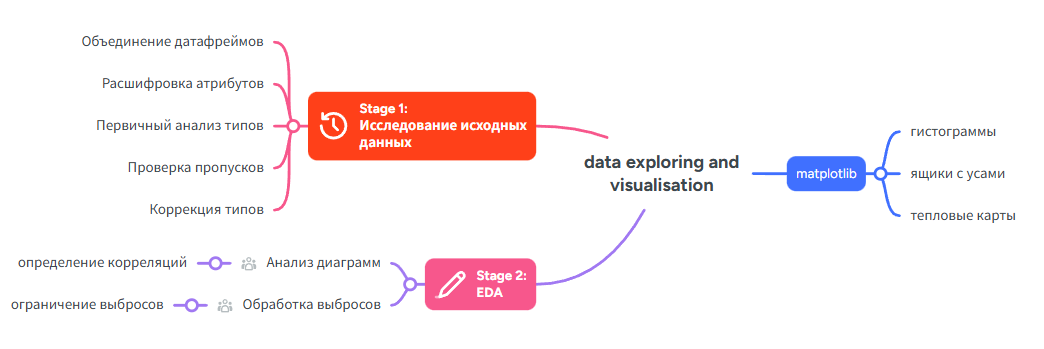